#LAB 1 Apply MP neurons in binary classification problem

In [4]:
#AND GATE
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
w1 = [1, 1, 1, 1]
w2 = [1, 1, 1, 1]
t = 2
#output
print("x1    x2    w1   w2     t     O")
for i in range(len(x1)):
    if ( x1[i]*w1[i] + x2[i]*w2[i] ) >= t:
        print(x1[i],'   ',x2[i],'   ',w1[i],'   ',w2[i],'   ',t,'   ', 1)
    else:
        print(x1[i],'   ',x2[i],'   ',w1[i],'   ',w2[i],'   ',t,'   ', 0)

x1    x2    w1   w2     t     O
0     0     1     1     2     0
0     1     1     1     2     0
1     0     1     1     2     0
1     1     1     1     2     1


In [5]:
#OR GATE
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
w1 = [1, 1, 1, 1]
w2 = [1, 1, 1, 1]
t = 1
#output
print("x1    x2    w1   w2     t     O")
for i in range(len(x1)):
    if ( x1[i]*w1[i] + x2[i]*w2[i] ) >= t:
        print(x1[i],'   ',x2[i],'   ',w1[i],'   ',w2[i],'   ',t,'   ', 1)
    else:
        print(x1[i],'   ',x2[i],'   ',w1[i],'   ',w2[i],'   ',t,'   ', 0)

x1    x2    w1   w2     t     O
0     0     1     1     1     0
0     1     1     1     1     1
1     0     1     1     1     1
1     1     1     1     1     1


In [ ]:
#NOT GATE
x = [0, 1]
w = [-1, -1]
t = 0
#output
print("x      w     t     O")
for i in range(len(x)):
    if ( x[i]*w[i]) >= t:
        print(x[i],'   ',w[i],'   ',t,'   ', 1)
    else:
        print(x[i],'   ',w[i],'   ',t,'   ', 0)

X: 0 Y: 1


#LAB 2 Apply sigmoid function to solve classification / regression problems

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
def sigmoid(x):
  return 1/(1+np.exp(-x))
class sigmoid_neuron:
  def __init__(self,input):
    self.wt=np.random.rand(input)
    self.b=np.random.rand()
  def forward(self,x):
    z=np.dot(x,self.wt)+self.b
    return sigmoid(z)
  def backward(self,x,y_true,y_pred):
    delta=y_true,y_pred
    dw=np.dot(input.T,delta)
    db=np.sum(delta)
    return dw,db
  def train(self,x,y_true,epochs,lr):
    for epoch in range(epochs):
      y_pred=self.forward
      dw,db=self.backward(x,y_true,y_pred)
      self.wt=lr*dw
      self.b=lr*db
  def predict(self,x):
    return np.round(self.forward(x))
iris=load_iris()
X=iris.data[:,:2]
Y=(iris.target!=0).astype(int)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
input=X_train.shape[1]
model=sigmoid_neuron(input)
epochs=30
lr=0.1
y_pred=model.predict(X_test)
accuracy=np.mean(y_pred==Y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  66.66666666666666


#LAB 3 FEEDFORWARD NETWORK

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
data=load_iris()
X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch 1/30
4/4 [==============================] - 1s 77ms/step - loss: 1.2445 - accuracy: 0.2778 - val_loss: 1.1500 - val_accuracy: 0.4167
Epoch 2/30
4/4 [==============================] - 0s 13ms/step - loss: 1.1390 - accuracy: 0.3056 - val_loss: 1.0821 - val_accuracy: 0.4167
Epoch 3/30
4/4 [==============================] - 0s 12ms/step - loss: 1.0382 - accuracy: 0.4074 - val_loss: 1.0216 - val_accuracy: 0.4167
Epoch 4/30
4/4 [==============================] - 0s 12ms/step - loss: 0.9562 - accuracy: 0.7037 - val_loss: 0.9679 - val_accuracy: 0.7500
Epoch 5/30
4/4 [==============================] - 0s 12ms/step - loss: 0.8796 - accuracy: 0.7778 - val_loss: 0.9186 - val_accuracy: 0.8333
Epoch 6/30
4/4 [==============================] - 0s 12ms/step - loss: 0.8079 - accuracy: 0.8148 - val_loss: 0.8705 - val_accuracy: 0.8333
Epoch 7/30
4/4 [==============================] - 0s 11ms/step - loss: 0.7416 - accuracy: 0.7963 - val_loss: 0.8253 - val_accuracy: 0.8333
Epoch 8/30
4/4 [===========

#LAB 4 STOCHASTIC- MINI BATCH GRADIENT DESCENT

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data=load_breast_cancer()
X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
lr=0.01
epochs=30
batch_size=32
num_features = X_train.shape[1]
num_samples = X_train.shape[0]
wt=np.random.rand(num_features)
for epoch in range(epochs):
  for batch_start in range(0, num_samples, batch_size):
    batch_end= min(batch_start + batch_size, num_samples)
    X_batch = X_train[batch_start:batch_end]
    y_batch = y_train[batch_start:batch_end]
    y_pred=np.dot(X_batch, wt)
    gradient = np.dot(X_batch.T, y_pred - y_batch) / batch_size
    wt -= lr*gradient
y_pred_test = np.dot(X_test, wt)
y_pred_test[y_pred_test >= 0.5] = 1
y_pred_test[y_pred_test < 0.5] = 0
accuracy = np.mean(y_pred_test == y_test)
print("Accuracy: ",accuracy)

Accuracy:  0.8947368421052632


# Implementation of gradient descent in linear regression

In [ ]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt


class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]

	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
												np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
												np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X:
			X = self.X
		b = self.b
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred

	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	# def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
		f = plt.figure(fig)
		plt.scatter(self.X, self.Y, color='b')
		plt.plot(self.X, Y_pred, color='g')
		f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []

	# original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')

	while 1:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)

		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	# final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	# plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])


if __name__ == '__main__':
	main()



#LAB 6 REGULARIZATION/NN OPTIMIZATION

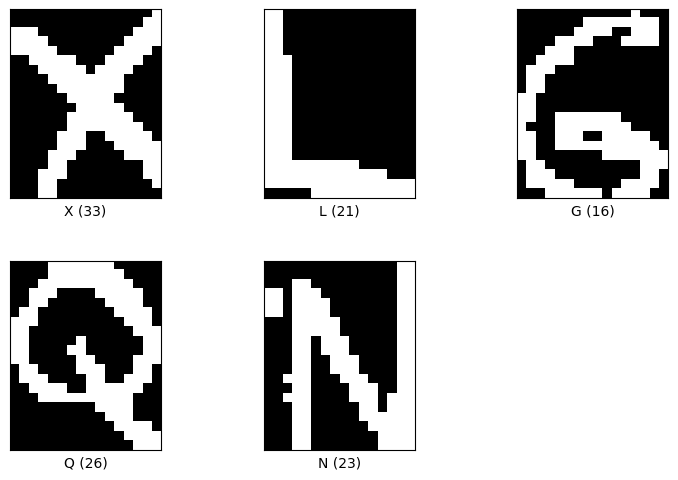

(1123, 20, 16, 1)
(281, 20, 16, 1)
(1123,)
(281,)
Epoch 1/50
36/36 [==============================] - 3s 51ms/step - loss: 3.5842 - accuracy: 0.0392 - val_loss: 3.5810 - val_accuracy: 0.0178
Epoch 2/50
36/36 [==============================] - 2s 60ms/step - loss: 3.4942 - accuracy: 0.0677 - val_loss: 3.1593 - val_accuracy: 0.1495
Epoch 3/50
36/36 [==============================] - 3s 76ms/step - loss: 3.1816 - accuracy: 0.1113 - val_loss: 2.6216 - val_accuracy: 0.2491
Epoch 4/50
36/36 [==============================] - 2s 44ms/step - loss: 2.8885 - accuracy: 0.1656 - val_loss: 2.3200 - val_accuracy: 0.2883
Epoch 5/50
36/36 [==============================] - 2s 45ms/step - loss: 2.7303 - accuracy: 0.1995 - val_loss: 2.1234 - val_accuracy: 0.3665
Epoch 6/50
36/36 [==============================] - 2s 45ms/step - loss: 2.5599 - accuracy: 0.2378 - val_loss: 2.0319 - val_accuracy: 0.3559
Epoch 7/50
36/36 [==============================] - 2s 42ms/step - loss: 2.4724 - accuracy: 0.2520 - val

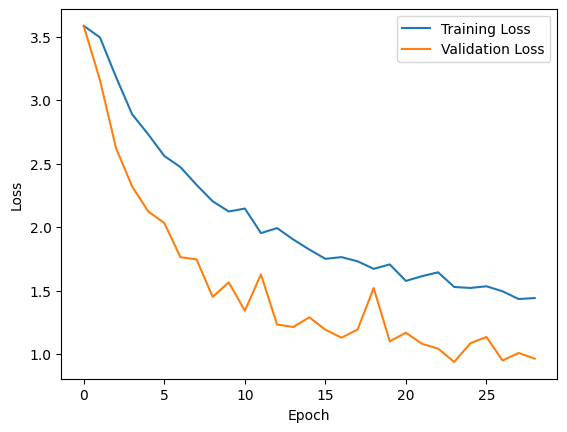

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the Binary Alpha Digits dataset
data, info = tfds.load("binary_alpha_digits", split = "train", with_info=True)
samples = data.take(5)
tfds.show_examples(samples, info)


# Extract data and labels
X = data
y = info

# Split the dataset into training and testing sets
X_train,y_train = tfds.as_numpy(tfds.load("binary_alpha_digits", split = "train[:80%]", batch_size=-1, as_supervised=True))
X_test,y_test =tfds.as_numpy(tfds.load("binary_alpha_digits", split = "train[80%:]", batch_size=-1,as_supervised=True))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# Define a neural network model with L2 regularization, dropout, and early stopping
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32,(3,3),padding = "same", input_shape = (20,16,1),activation = "relu"),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64,(3,3),padding = "same",activation = "relu"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = "relu"),
    tf.keras.layers.Dense(36, activation = "softmax")

])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation using TensorFlow's ImageDataGenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Create a data generator for training
train_datagen = datagen.flow(X_train, y_train, batch_size=32)

# Fit the model with data augmentation and early stopping
history = model.fit(train_datagen,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    callbacks=[early_stopping])


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#LAB 7 SKIPGRRAM

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import numpy as np


corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]

# Tokenize the corpus
def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

tokenized_corpus = tokenize_corpus(corpus)

vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

# Create two dictionaries for mapping between word and index
word_to_idx = {word: i for i, word in enumerate(vocabulary)}
idx_to_word = {i: word for i, word in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)



window_size = 2 # context_size
idx_pairs = []

# for each sentence
for sentence in tokenized_corpus:
    indices = [word_to_idx[w] for w in sentence]
    # treat each word as a "center word"
    for center_word_pos in range(len(indices)):
        # window position based on the given window size
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            # keep an array of pairs of <center_word_idx, context_word_idx>
            idx_pairs.append((indices[center_word_pos], context_word_idx))

            # With each word as a "center word", check the context word positions

idx_pairs = np.array(idx_pairs)


# Center word with one-hot encoding
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

# hidden layer
embedding_dim = 10
W1 = Variable(torch.randn(embedding_dim, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dim).float(), requires_grad=True)
epoch = 200
lr = 0.001

for i in range(epoch):
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data).float())
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)

        # On top of the hidden layer, use "softmax layer"
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.item()
        # Backpropagation
        loss.backward()

        W1.data -= lr * W1.grad.data
        W2.data -= lr * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
   # Get user input word
user_word = input("Enter a word: ")

# Find the position(s) of the user input word in the tokenized corpus
user_pos = [i for i, sentence in enumerate(tokenized_corpus) if user_word in sentence]

# Get the index of the user input word in the vocabulary
user_idx = word_to_idx[user_word]

# Print the range of words before and after the user input word
for pos in user_pos:
    before = [tokenized_corpus[pos][i] for i in range(max(0, user_idx-2), user_idx)]
    after = [tokenized_corpus[pos][i] for i in range(user_idx+1, min(len(tokenized_corpus[pos]), user_idx+3))]
    print(before, user_word, after)



Enter a word: is
['he'] is ['a', 'king']
['she'] is ['a', 'queen']
['he'] is ['a', 'man']
['she'] is ['a', 'woman']
['warsaw'] is ['poland', 'capital']
['berlin'] is ['germany', 'capital']
['paris'] is ['france', 'capital']


# EXP 8 lenet

In [11]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 5

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__() # fix here
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

model = LeNet5(num_classes).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_step = len(train_loader)
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = cost(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 98.75 %


#lab 10 VGG16

In [14]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",split=["train[:70%]", "train[:30%]"],batch_size=-1,as_supervised=True)

## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

base_model.summary()

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(train_ds, train_labels, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])

history = model.fit(train_ds, train_labels, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

KeyboardInterrupt: ignored